# Introduction

The analysis below was carried out using data from IBM HR that was made available on the website www.kaggle.com. 

Our motivation is to understand the profile of the people who leave the company. This can be important for preventing redundancies, reducing operating costs and improving employee satisfaction, which should consequently increase the company's productivity. 

Questions that we will try to answer with analysis: 
- Is there a pay gap between men and women? 
- Is there any evidence that gender has an impact on friction between employee and company?
- What is the relationship between salary and the department in which the employee works?
<br>
<br>
<br>

# Loading Libraries

In [27]:
import pandas as pd
import numpy as np 

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')

# Loading Dataset

In [28]:
rh = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [29]:
rh.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [30]:
rh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [31]:
rh.shape

(1470, 35)

In [32]:
rh.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

# Univariate Data Analysis

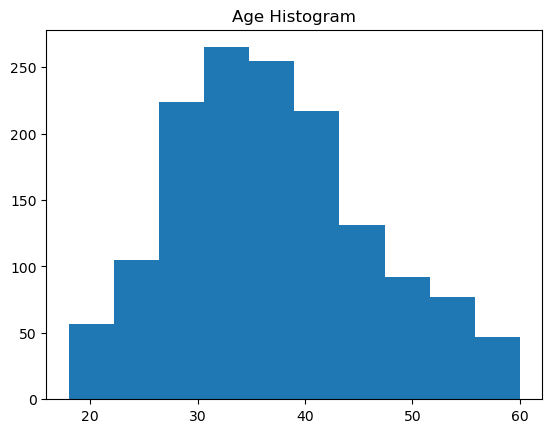

In [34]:
_ = plt.hist(rh.Age)
_ = plt.title("Age Histogram")

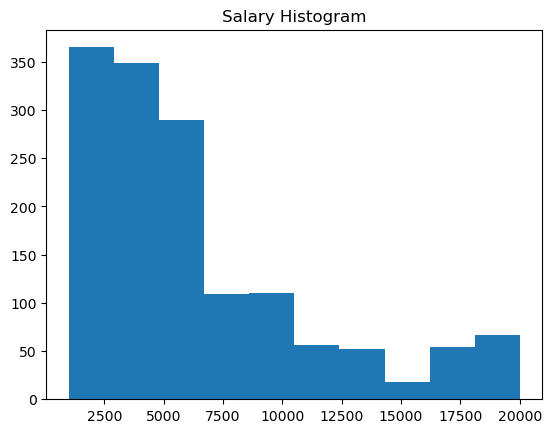

In [35]:
_ = plt.hist(rh.MonthlyIncome)
_ = plt.title("Salary Histogram")

In [36]:
rh.Gender.value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

In [37]:
rh.Gender.value_counts(1)

Gender
Male      0.6
Female    0.4
Name: proportion, dtype: float64

In [38]:
rh.EducationField.value_counts(1)

EducationField
Life Sciences       0.412245
Medical             0.315646
Marketing           0.108163
Technical Degree    0.089796
Other               0.055782
Human Resources     0.018367
Name: proportion, dtype: float64

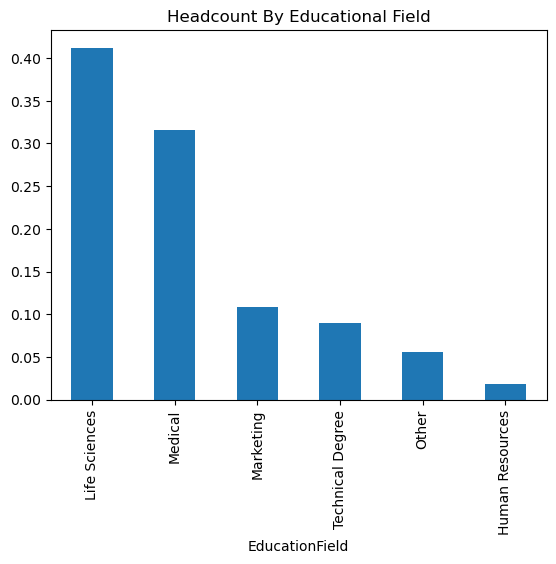

In [40]:
_ = rh.EducationField.value_counts(1).plot.bar()
_ = plt.title("Headcount By Educational Field")

The analysis showed that the majority of employees are trained in Life Sciences. This is followed by a large number of Medical employees. The area with the fewest graduates is Human Resources. 

# Bivariate Data Analysis

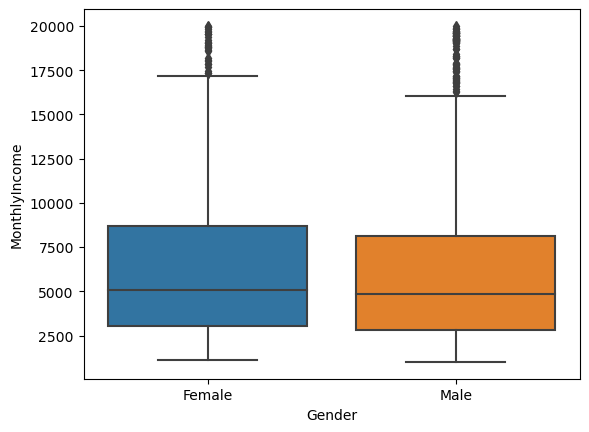

In [41]:
_ = sns.boxplot(x='Gender', y='MonthlyIncome',data=rh)

Interestingly, the distribution of salaries between men and women is very similar. 

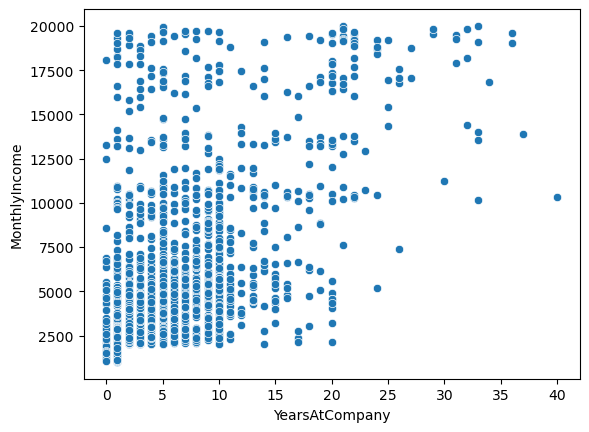

In [42]:
_ = sns.scatterplot(x='YearsAtCompany', y='MonthlyIncome', data = rh)